In [2]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup

# All dates used for parsing the website in segments
dates_2019_2020 = [
    ("01.01.2019", "31.01.2019"),
    ("01.02.2019", "28.02.2019"),
    ("01.03.2019", "31.03.2019"),
    ("01.04.2019", "30.04.2019"),
    ("01.05.2019", "31.05.2019"),
    ("01.06.2019", "30.06.2019"),
    ("01.07.2019", "31.07.2019"),
    ("01.08.2019", "31.08.2019"),
    ("01.09.2019", "30.09.2019"),
    ("01.10.2019", "31.10.2019"),
    ("01.11.2019", "30.11.2019"),
    ("01.12.2019", "31.12.2019"),
    ("01.01.2020", "31.01.2020"),
    ("01.02.2020", "28.02.2020"),
    ("01.03.2020", "31.03.2020"),
    ("01.04.2020", "30.04.2020"),
    ("01.05.2020", "31.05.2020"),
    ("01.06.2020", "30.06.2020"),
    ("01.07.2020", "31.07.2020"),
    ("01.08.2020", "31.08.2020"),
    ("01.09.2020", "30.09.2020"),
]



# Scrape the site
dates_list = []
for dates in dates_2019_2020:
    start_date = dates[0]
    end_date = dates[1]
    url = f"https://w2.brreg.no/kunngjoring/kombisok.jsp?datoFra={start_date}&datoTil={end_date}&id_region=0&id_niva1=51&id_niva2=-+-+-&id_bransje1=0"
    parsed_content = BeautifulSoup(requests.get(url).content, "html.parser")
    content = parsed_content.find_all("table")[4].find_all("tr")[5:]
    for rows in content:
        if (rows.find("a")) and ("Konkursåpning" in rows.find("a").text or "Konkursåpning i hjemlandet" in rows.find("a").text):
            
            dates_list.append(rows.find_all("td")[5].find("p").text)
            









In [3]:
# Split up between 2019 and 2020
bankrupt_2019 = []
bankrupt_2020 = []
for i in dates_list:
    splitted = i.split(".")
    day = int(splitted[0])
    month = int(splitted[1])
    year = int(splitted[2])
    date = datetime(year,month,day).strftime('%b')
    if year == 2019:
        bankrupt_2019.append(date)
    else:
        bankrupt_2020.append(date)



In [4]:
# Calculate accumulated 2019
bankrupt_2019_accumulated = []
for counter, elem in enumerate(bankrupt_2019):
    if (elem, counter-1) in bankrupt_2019_accumulated:
        bankrupt_2019_accumulated.remove((elem,counter-1))

        bankrupt_2019_accumulated.append((elem, counter))
    else:
        bankrupt_2019_accumulated.append((elem, counter))

# Calculate accumuluted 2020
bankrupt_2020_accumulated = []
for counter, elem in enumerate(bankrupt_2020):
    if (elem, counter-1) in bankrupt_2020_accumulated:
        bankrupt_2020_accumulated.remove((elem,counter-1))
        bankrupt_2020_accumulated.append((elem, counter))
    else:
        bankrupt_2020_accumulated.append((elem, counter))



## Konkursåpninger i Norge
Det ser ut til at det ikke er noen relasjon mellom Korona viruset og antall konkurses så langt i 2020. 
Men dette er noe som kanskje har større effekt i ettertid. I 2021-2022

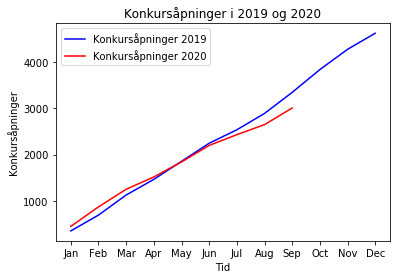

In [5]:
# Plot
x_val_2019 = [x[0] for x in bankrupt_2019_accumulated]
y_val_2019 = [x[1] for x in bankrupt_2019_accumulated]

x_val_2020 = [x[0] for x in bankrupt_2020_accumulated]
y_val_2020 = [x[1] for x in bankrupt_2020_accumulated]

plt.plot(x_val_2019, y_val_2019, label='Konkursåpninger 2019', color='blue')
plt.plot(x_val_2020, y_val_2020, label='Konkursåpninger 2020', color = 'red')
plt.legend()
plt.xlabel('Tid')
plt.ylabel('Konkursåpninger')
plt.title('Konkursåpninger i 2019 og 2020')
plt.savefig("bankrupt.png", dpi=500)
plt.show()